In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Downloading the csv file from your account
url = 'https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/falls1.csv'
 
snow = pd.read_csv(url)
snow = snow.drop(columns = ['Unnamed: 0'])
snow['date']  =  pd.to_datetime(snow['date'] , format='%Y-%m-%d')
snow.isna().sum()

date            0
snow_depth    176
month           0
year            0
dtype: int64

In [3]:
snow.head()

,date,snow_depth,month,year
0,2020-06-05,NaN,6,2020
1,2020-06-06,0.0,6,2020
2,2020-06-07,0.0,6,2020
3,2020-06-08,0.0,6,2020
4,2020-06-09,0.0,6,2020


In [4]:
snow.dtypes

date          datetime64[ns]
snow_depth           float64
month                  int64
year                   int64
dtype: object

In [5]:
snow.fillna(method='ffill', inplace=True)
snow.isna().sum()

date          0
snow_depth    1
month         0
year          0
dtype: int64

In [6]:
snow.dtypes

date          datetime64[ns]
snow_depth           float64
month                  int64
year                   int64
dtype: object

In [7]:
snow.head()

,date,snow_depth,month,year
0,2020-06-05,NaN,6,2020
1,2020-06-06,0.0,6,2020
2,2020-06-07,0.0,6,2020
3,2020-06-08,0.0,6,2020
4,2020-06-09,0.0,6,2020


In [8]:
def get_git_csv_temp(url):
    '''Reads in a csv file which is assumed to have the following columns
    'Product code'
    'Bureau of Meteorology station number'
    'Year'
    'Month'
    'Day'
    'Maximum temperature (Degree C)'
    'Days of accumulation of maximum temperature'
    'Quality'
    
       This function does two things: 
       1) Drops Unwanted Columns 
       2) Parses Date Column

       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with date and Maximum temperature'''
    
    # Pass the csv file to a create a dataframe for pre processing.
    df = pd.read_csv(url)
    
    df = df.drop(columns = ['Product code',
                            'Bureau of Meteorology station number',
                            'Days of accumulation of maximum temperature',
                            'Quality'])
    # Parse the date column
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Drop the unwanted columns
    df = df.drop(columns = ['Year', 'Month', 'Day'])
    
    return df

In [9]:
def get_git_csv_rain(url):
    '''Reads in a csv file which is assumed to have the following columns
    'Product code'
    'Bureau of Meteorology station number'
    'Year'
    'Month'
    'Day'
    'Maximum temperature (Degree C)'
    'Days of accumulation of maximum temperature'
    'Quality'
    
       This function does two things: 
       1) Drops Unwanted Columns 
       2) Parses Date Column

       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with date and Maximum temperature'''
    
    # Pass the csv file to a create a dataframe for pre processing.
    df = pd.read_csv(url)
    
    df = df.drop(columns = ['Product code',
                            'Bureau of Meteorology station number',
                            'Period over which rainfall was measured (days)',
                            'Quality'])
    # Parse the date column
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Drop the unwanted columns
    df = df.drop(columns = ['Year', 'Month', 'Day'])
    
    return df

In [10]:
temp_2016 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2016_Data.csv')
temp_2017 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2017_Data.csv')
temp_2018 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2018_Data.csv')
temp_2019 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2019_Data.csv')
temp_2020 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2020_Data.csv')
temp_2021 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2021_Data.csv')

rain_2016 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2016_Data.csv')
rain_2017 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2017_Data.csv')
rain_2018 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2018_Data.csv')
rain_2019 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2019_Data.csv')
rain_2020 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2020_Data.csv')
rain_2021 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2021_Data.csv')


temp = pd.concat([temp_2016,temp_2017,temp_2018,temp_2019,temp_2020,temp_2021])
rain = pd.concat([rain_2016,rain_2017,rain_2018,rain_2019,rain_2020,rain_2021])

weather = temp.merge(rain, on='date', how='left')
weather = weather.reindex(columns=['date', 'Maximum temperature (Degree C)','Rainfall amount (millimetres)'])
weather.to_csv('weather.csv', index = False)

In [11]:
weather.head()

,date,Maximum temperature (Degree C),Rainfall amount (millimetres)
0,2016-01-01,21.2,0.0
1,2016-01-02,15.4,1.8
2,2016-01-03,9.7,9.4
3,2016-01-04,8.5,14.0
4,2016-01-05,12.4,17.8


In [12]:
weather.dtypes

date                              datetime64[ns]
Maximum temperature (Degree C)           float64
Rainfall amount (millimetres)            float64
dtype: object

In [13]:
snow.dtypes

date          datetime64[ns]
snow_depth           float64
month                  int64
year                   int64
dtype: object

In [14]:
time_df = snow.merge(weather, on='date', how='inner')

In [15]:
time_df.head()

,date,snow_depth,month,year,Maximum temperature (Degree C),Rainfall amount (millimetres)
0,2020-06-05,NaN,6,2020,5.3,0.8
1,2020-06-06,0.0,6,2020,4.8,0.2
2,2020-06-07,0.0,6,2020,4.0,0.0
3,2020-06-08,0.0,6,2020,7.0,0.4
4,2020-06-09,0.0,6,2020,5.2,0.0


In [16]:
time_df.dtypes

date                              datetime64[ns]
snow_depth                               float64
month                                      int64
year                                       int64
Maximum temperature (Degree C)           float64
Rainfall amount (millimetres)            float64
dtype: object

In [17]:
time_df.isna().sum()

date                               0
snow_depth                         1
month                              0
year                               0
Maximum temperature (Degree C)    19
Rainfall amount (millimetres)     57
dtype: int64

In [18]:
time_df.to_csv('time.csv', index = False)

In [19]:
df = time_df

In [22]:
df.isna().sum()

date                               0
snow_depth                         1
month                              0
year                               0
Maximum temperature (Degree C)    19
Rainfall amount (millimetres)     57
dtype: int64

In [20]:
# Select Global active power data
power_df = df['snow_depth'].copy()
print(power_df.shape)

(635,)


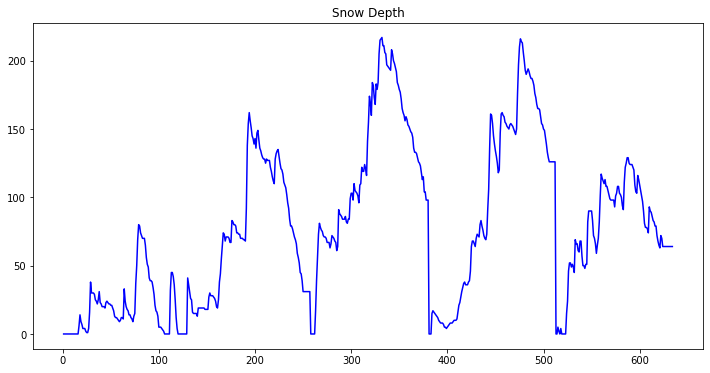

In [21]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
power_df.plot(title='Snow Depth', color='blue') 
plt.show()